In [15]:
import tensorflow_datasets as tfds

import sys
import os
sys.path.append(os.path.abspath('..'))

from src.data import make_datasets
from src.utils import display_sample, create_mask

In [16]:
DATASET_NAME = 'oxford_iiit_pet:4.0.0'
dataset, info = tfds.load(DATASET_NAME, with_info=True)
print('Dataset cargado:', DATASET_NAME)

Dataset cargado: oxford_iiit_pet:4.0.0


In [17]:
list(dataset.keys())

['train', 'test']

In [18]:
ex = next(iter(dataset['train']))
ex.keys(), ex['image'].shape, ex['segmentation_mask'].shape

(dict_keys(['file_name', 'head_bbox', 'image', 'label', 'segmentation_mask', 'species']),
 TensorShape([500, 500, 3]),
 TensorShape([500, 500, 1]))

In [19]:
ex = next(iter(dataset['test']))
ex.keys(), ex['image'].shape, ex['segmentation_mask'].shape

(dict_keys(['file_name', 'head_bbox', 'image', 'label', 'segmentation_mask', 'species']),
 TensorShape([500, 403, 3]),
 TensorShape([500, 403, 1]))

In [20]:
info.version, info.splits, info.splits['train'].num_examples

(Version('4.0.0'),
 {'train': <SplitInfo num_examples=3680, num_shards=4>,
  'test': <SplitInfo num_examples=3669, num_shards=4>},
 3680)

In [21]:
TRAIN_LENGTH = info.splits['train'].num_examples
BATCH_SIZE = 64 
BUFFER_SIZE = 1000 # Buffer size for shuffling the dataset
STEPS_PER_EPOCH = TRAIN_LENGTH // BATCH_SIZE # Number of steps per epoch
TRAIN_LENGTH, STEPS_PER_EPOCH

(3680, 57)

In [22]:
train_batches, test_batches, info = make_datasets(DATASET_NAME, BATCH_SIZE,BUFFER_SIZE,True)

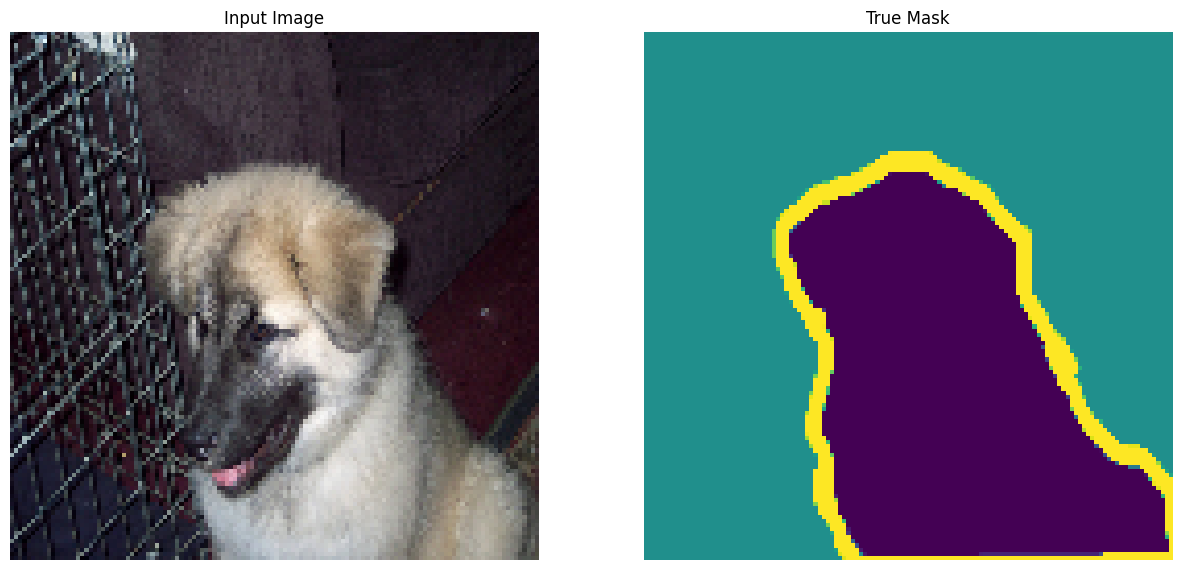

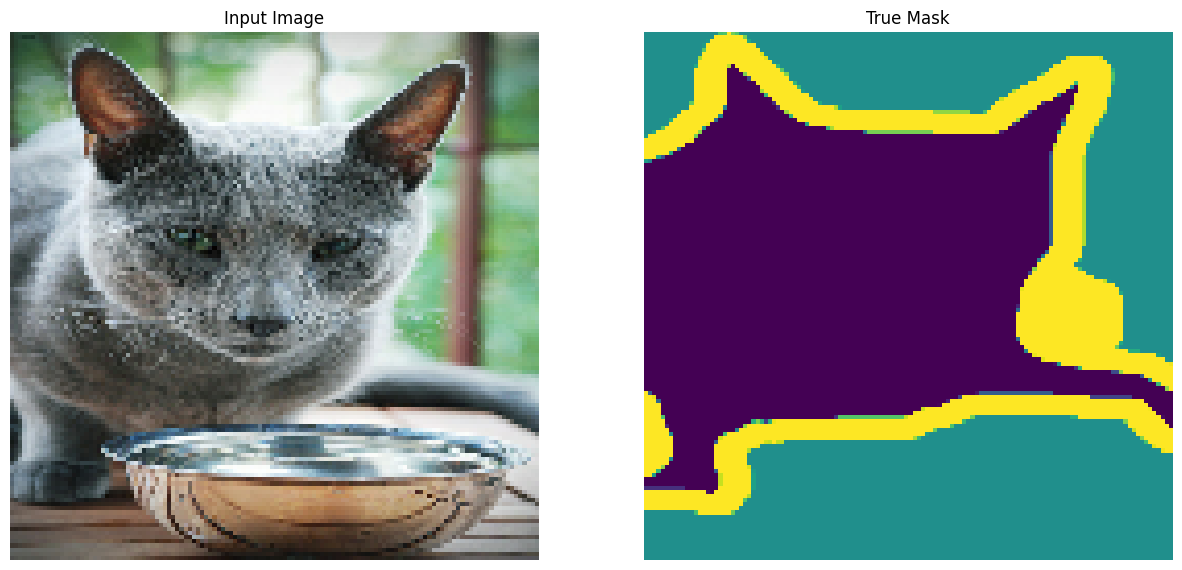

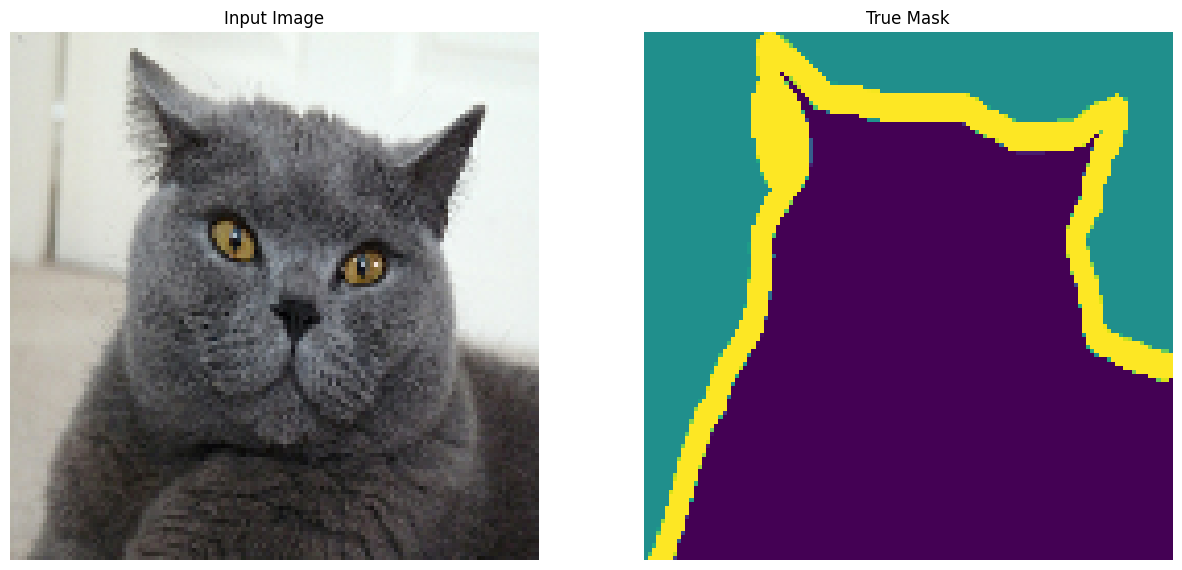

In [23]:
for images, masks in train_batches.take(3):
  sample_image, sample_mask = images[0], masks[0]
  display_sample([sample_image, sample_mask])